# RNN

Recurrent Neural Network (RNN) adalah jenis neural network yang dirancang khusus untuk memproses data yang berurutan, seperti time series data. Pada kasus forecasting, RNN dapat digunakan untuk memprediksi nilai masa depan dari suatu time series berdasarkan data historisnya.

RNN memiliki kemampuan untuk menyimpan informasi dari waktu sebelumnya dan menggunakannya sebagai input untuk waktu berikutnya, sehingga dapat menghasilkan prediksi yang lebih akurat. Hal ini dilakukan dengan menggunakan "memory state" atau "hidden state" pada setiap langkah waktu dalam proses prediksi.

Salah satu arsitektur RNN yang populer untuk forecasting adalah Long Short-Term Memory (LSTM). LSTM memiliki kemampuan untuk mempelajari dependensi jangka panjang dalam data dan menghindari masalah vanishing gradient yang sering terjadi pada RNN tradisional. LSTM juga memiliki "gates" yang dapat mengontrol aliran informasi dalam model, sehingga dapat menghindari overfitting pada data training.

Dalam konteks forecasting, RNN dapat dilatih dengan menggunakan data historis sebagai input dan nilai masa depan sebagai output yang diinginkan. Setelah dilatih, model dapat digunakan untuk memprediksi nilai masa depan berdasarkan data historis yang diberikan. Namun, perlu diketahui bahwa prediksi yang dihasilkan oleh RNN tidak selalu akurat dan dapat terpengaruh oleh faktor-faktor eksternal yang tidak terduga. Oleh karena itu, penting untuk terus memonitor performa model dan melakukan evaluasi secara berkala untuk memastikan akurasi prediksi yang optimal.

In [2]:
# Impor library yang dibutuhkan
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [16]:
# Load data
data = pd.read_csv('C:/Users/lenovo/Documents/Ekonometrika/BBCA Historical Data (1).csv', parse_dates=["Date"])
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-12-30,"8,550","8,575","8,650","8,550",44.68M,-0.29%
1,2022-12-29,"8,575","8,525","8,600","8,500",47.02M,-0.87%
2,2022-12-28,"8,650","8,650","8,650","8,550",48.37M,0.58%
3,2022-12-27,"8,600","8,600","8,650","8,575",28.69M,0.29%
4,2022-12-26,"8,575","8,500","8,625","8,500",20.52M,0.88%


In [17]:
data['Price'] = data['Price'].str.replace(',', '').astype(float)
print(data['Price'].dtypes)

float64


In [22]:
# Membuat data training dan testing
train_data = data.iloc[:200, 1].values
test_data = data.iloc[200:, 1].values

# Melakukan scaling pada data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.reshape(-1, 1))

In [23]:
# Membuat dataset dengan timesteps yang diinginkan
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps), 0]
        X.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

In [24]:
# Menentukan jumlah timesteps dan membangun dataset
time_steps = 10
X_train, y_train = create_dataset(train_data_scaled, time_steps)
X_test, y_test = create_dataset(test_data_scaled, time_steps)

# Reshaping dataset menjadi bentuk yang dapat diterima oleh model RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Epoch 1/100
6/6 [==============================] - 10s 29ms/step - loss: 0.1532
Epoch 2/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0222
Epoch 3/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0259
Epoch 4/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0120
Epoch 5/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0148
Epoch 6/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0098
Epoch 7/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0105
Epoch 8/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0087
Epoch 9/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0085
Epoch 10/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0079
Epoch 11/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0077
Epoch 12/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0076
Epoch 13/100
6/6 [==============================

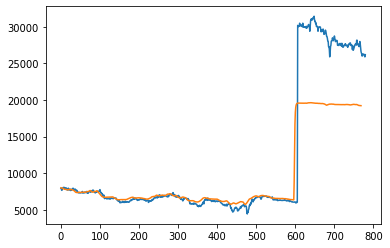

In [27]:
# Membangun model RNN
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Menentukan parameter dan fungsi loss yang digunakan
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model dengan data training
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Melakukan prediksi dengan data testing
predictions = model.predict(X_test)

# Mengembalikan hasil normalisasi ke skala asli
predictions = scaler.inverse_transform(predictions)

# Menampilkan hasil prediksi dan data testing
plt.plot(test_data)
plt.plot(predictions)
plt.show()

# LSTM
Long Short-Term Memory (LSTM) adalah jenis arsitektur Recurrent Neural Network (RNN) yang sangat populer dalam kasus forecasting. LSTM dirancang untuk mempelajari dependensi jangka panjang dalam data dan menghindari masalah vanishing gradient yang sering terjadi pada RNN tradisional.

Pada dasarnya, LSTM memiliki kemampuan untuk mempertahankan informasi dari waktu sebelumnya dan menggunakannya sebagai input untuk waktu berikutnya, sehingga dapat menghasilkan prediksi yang lebih akurat. Hal ini dilakukan dengan menggunakan "gates" pada setiap langkah waktu dalam proses prediksi.

Gates pada LSTM terdiri dari tiga jenis, yaitu forget gate, input gate, dan output gate. Ketiga jenis gates ini memiliki fungsi yang berbeda-beda, yaitu:

- Forget gate
Forget gate digunakan untuk mengatur seberapa banyak informasi yang akan dihapus dari memory state pada time step sebelumnya. Hal ini dilakukan untuk menghindari terjadinya overfitting pada data training.

- Input gate
Input gate digunakan untuk mengatur seberapa banyak informasi baru yang akan dimasukkan ke dalam memory state pada time step saat ini. Informasi baru ini akan dikombinasikan dengan informasi yang disimpan pada memory state sebelumnya.

- Output gate
Output gate digunakan untuk mengatur seberapa banyak informasi yang akan diambil dari memory state saat ini dan digunakan sebagai output pada time step saat ini.

Dalam kasus forecasting, LSTM dapat digunakan untuk memprediksi nilai masa depan dari suatu time series. Langkah-langkah umum yang dilakukan dalam penggunaan LSTM pada kasus forecasting adalah sebagai berikut:

1. Persiapkan data training dan data testing.
Data training adalah data historis yang digunakan untuk melatih model LSTM, sedangkan data testing adalah data masa depan yang akan digunakan untuk menguji performa model.

2. Lakukan preprocessing data.
Preprocessing data meliputi penghapusan outlier, imputasi missing value, dan normalisasi data.

3. Buat model LSTM.
Model LSTM dapat dibuat dengan menggunakan beberapa layer LSTM yang saling terhubung. Pada setiap layer, terdapat input gate, forget gate, dan output gate, serta memory state yang digunakan untuk menyimpan informasi dari waktu sebelumnya.

4. Latih model dengan data training.
Proses pelatihan model dilakukan untuk mengoptimalkan performa model dalam memprediksi nilai masa depan. Pada setiap iterasi, model akan memperbarui parameter berdasarkan perbedaan antara prediksi dan nilai sebenarnya.

5. Evaluasi performa model dengan menggunakan data testingSetelah model dilatih, model dievaluasi dengan menggunakan data testing untuk melihat akurasi prediksi dari model. Beberapa metrik evaluasi yang dapat digunakan antara lain RMSE, MAE, dan MAPE.

6. Gunakan model untuk memprediksi nilai masa depan.
Setelah model berhasil dilatih dan dievaluasi, model dapat digunakan untuk memprediksi nilai masa depan berdasarkan data historis yang diberikan.

7. Monitor performa model secara berkala.
Karena prediksi yang dihasilkan oleh LSTM tidak selalu akurat dan dapat terpengaruh oleh faktor-faktor eksternal yang tidak terduga, penting untuk terus memonitor performa model dan melakukan evaluasi secara berkala untuk memastikan akurasi prediksi yang optimal.

Beberapa keuntungan menggunakan LSTM pada kasus forecasting adalah:

- Kemampuan mempelajari dependensi jangka panjang dalam data.
LSTM memiliki kemampuan untuk mempelajari dependensi jangka panjang dalam data, sehingga dapat menghasilkan prediksi yang lebih akurat.

- Kemampuan menghindari masalah vanishing gradient.
Masalah vanishing gradient sering terjadi pada RNN tradisional, namun LSTM dirancang untuk menghindari masalah tersebut sehingga dapat menghasilkan prediksiyang lebih stabil dan akurat.

- Kemampuan mengatur seberapa banyak informasi yang disimpan pada memory state.
Gates pada LSTM memungkinkan pengaturan seberapa banyak informasi yang disimpan pada memory state, sehingga dapat menghindari overfitting pada data training dan menghasilkan prediksi yang lebih akurat.

Namun, terdapat beberapa hal yang perlu diperhatikan dalam penggunaan LSTM pada kasus forecasting, seperti:

- Memilih jumlah layer dan neuron yang tepat.
Pemilihan jumlah layer dan neuron pada model LSTM dapat mempengaruhi performa model. Jika jumlah layer dan neuron terlalu banyak, model dapat mengalami overfitting pada data training. Sebaliknya, jika jumlah layer dan neuron terlalu sedikit, model dapat mengalami underfitting.

- Memilih jangka waktu prediksi yang tepat.
Seperti pada penggunaan RNN pada umumnya, pada kasus forecasting dengan LSTM juga perlu mempertimbangkan jangka waktu prediksi yang tepat agar model dapat beradaptasi dengan baik pada data yang diberikan.

- Memilih metode pengoptimalan yang tepat.
Pada saat melatih model LSTM, diperlukan metode pengoptimalan yang tepat untuk meminimalkan error antara prediksi dan nilai sebenarnya. Beberapa metode pengoptimalan yang umum digunakan pada LSTM adalah Adam, RMSprop, dan Adagrad. Pemilihan metode pengoptimalan yang tepat dapat mempengaruhi kecepatan konvergensi model dan akurasi prediksi.

- Memilih metrik evaluasi yang tepat.
Dalam melakukan evaluasi performa model, perlu memilih metrik evaluasi yang tepat sesuai dengan kebutuhan bisnis atau keilmuan. Beberapa metrik evaluasi yang umum digunakan pada kasus forecasting adalah RMSE, MAE, dan MAPE.

- Mengatasi masalah overfitting dan underfitting.
Seperti pada model-machine learning pada umumnya, model LSTM juga dapat mengalami masalah overfitting atau underfitting. Untuk mengatasi masalah overfitting, dapat dilakukan dengan menggunakan regularisasi seperti dropout pada layer LSTM. Sedangkan untuk mengatasi masalah underfitting, dapat dilakukan dengan menambahkan layer LSTM atau menambahkan neuron pada layer LSTM yang sudah ada.

Dalam kesimpulannya, LSTM adalah jenis arsitektur RNN yang sangat populer dalam kasus forecasting karena kemampuannya untuk mempelajari dependensi jangka panjang dalam data dan menghindari masalah vanishing gradient. Penggunaan LSTM pada kasus forecasting dapatmembantu dalam memprediksi nilai masa depan dari suatu time series dengan akurasi yang lebih baik. Namun, perlu memperhatikan beberapa hal penting seperti memilih jumlah layer dan neuron yang tepat, memilih jangka waktu prediksi yang tepat, memilih metode pengoptimalan yang tepat, memilih metrik evaluasi yang tepat, dan mengatasi masalah overfitting dan underfitting.

In [31]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [39]:
# Membuat dataset untuk training dan testing
df = pd.read_csv('C:/Users/lenovo/Documents/Ekonometrika/BBCA Historical Data (1).csv', parse_dates=["Date"])
df['Price'] = df['Price'].str.replace(',', '').astype(float)
print(df['Price'].dtypes)

# Membagi data menjadi data training dan testing
train_data = data.iloc[:200, 1].values
test_data = data.iloc[200:, 1].values
train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)

float64


In [40]:
# Menormalisasi data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Membuat data training dan testing
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        X.append(dataset[i:(i+look_back), :])
        Y.append(dataset[i+look_back, -1])
    return np.array(X), np.array(Y)

look_back = 3
X_train, Y_train = create_dataset(train_data_scaled, look_back)
X_test, Y_test = create_dataset(test_data_scaled, look_back)

In [41]:
# Membuat model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Melatih model
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Membuat prediksi
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Mengembalikan data ke skala semula
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test= scaler.inverse_transform([Y_test])

# Menghitung error
from sklearn.metrics import mean_squared_error

train_error = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_error = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))

print("Train RMSE: %.2f" % (train_error))
print("Test RMSE: %.2f" % (test_error))

Epoch 1/100
197/197 - 9s - loss: 0.0264 - 9s/epoch - 43ms/step
Epoch 2/100
197/197 - 1s - loss: 0.0050 - 1s/epoch - 6ms/step
Epoch 3/100
197/197 - 1s - loss: 0.0052 - 1s/epoch - 6ms/step
Epoch 4/100
197/197 - 1s - loss: 0.0064 - 1s/epoch - 6ms/step
Epoch 5/100
197/197 - 1s - loss: 0.0048 - 1s/epoch - 7ms/step
Epoch 6/100
197/197 - 1s - loss: 0.0057 - 1s/epoch - 7ms/step
Epoch 7/100
197/197 - 1s - loss: 0.0044 - 1s/epoch - 7ms/step
Epoch 8/100
197/197 - 1s - loss: 0.0051 - 1s/epoch - 7ms/step
Epoch 9/100
197/197 - 1s - loss: 0.0046 - 1s/epoch - 6ms/step
Epoch 10/100
197/197 - 1s - loss: 0.0045 - 1s/epoch - 7ms/step
Epoch 11/100
197/197 - 1s - loss: 0.0044 - 1s/epoch - 5ms/step
Epoch 12/100
197/197 - 1s - loss: 0.0043 - 1s/epoch - 5ms/step
Epoch 13/100
197/197 - 1s - loss: 0.0042 - 872ms/epoch - 4ms/step
Epoch 14/100
197/197 - 1s - loss: 0.0042 - 1s/epoch - 5ms/step
Epoch 15/100
197/197 - 1s - loss: 0.0042 - 816ms/epoch - 4ms/step
Epoch 16/100
197/197 - 1s - loss: 0.0040 - 904ms/epoch - 

In [43]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

25/25 [==============================] - 0s 7ms/step


7966.416359805765

# Syntax Lain Dengan Model LSTM

In [66]:
# import packages dan dataset
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

stock_data = pd.read_csv('C:/Users/lenovo/Documents/Ekonometrika/BBCA Historical Dataa.csv', parse_dates=["Date"])
stock_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-05-26,"9,150","9,175","9,200","9,100",55.68M,1.10%
1,2023-05-25,"9,050","9,100","9,150","9,050",62.06M,0.28%
2,2023-05-24,"9,025","9,200","9,200","9,025",64.85M,-1.10%
3,2023-05-23,"9,125","9,050","9,150","9,025",87.74M,1.39%
4,2023-05-22,"9,000","9,000","9,075","8,925",91.00M,0.00%


Text(0, 0.5, 'Prices ($)')

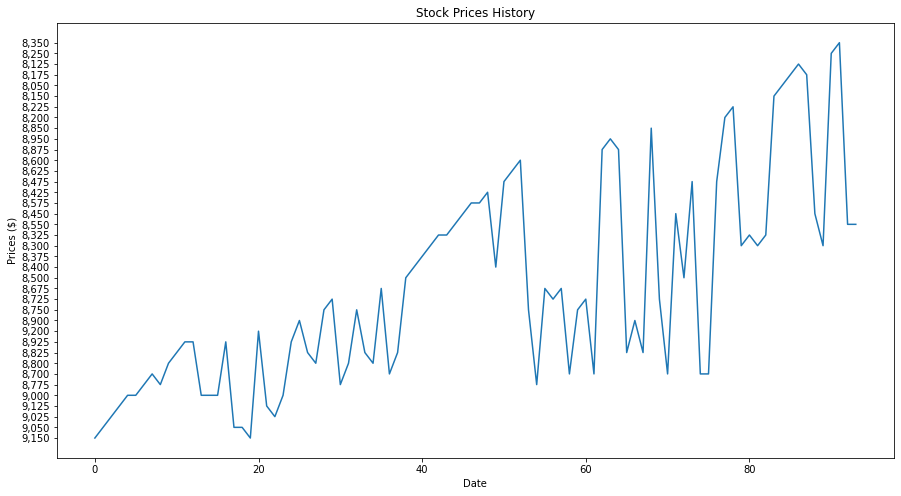

In [72]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Price'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [73]:
stock_data['Price'] = stock_data['Price'].str.replace(',', '').astype(float)
print(stock_data['Price'].dtypes)

float64


In [74]:
close_prices = stock_data['Price']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [75]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [76]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_11 (LSTM)              (None, 100)               80400     
                                                                 
 dense_5 (Dense)             (None, 25)                2525      
                                                                 
 dense_6 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
16/16 [==============================] - 8s 55ms/step - loss: 0.0804
Epoch 2/3
16/16 [==============================] - 1s 58ms/step - loss: 0.0205
Epoch 3/3
16/16 [==============================] - 1s 64ms/step - loss: 0.0590


In [78]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1/1 [==============================] - 2s 2s/step


155.96592881944446

C:\Users\lenovo\AppData\Local\Temp/ipykernel_11728/1361245893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


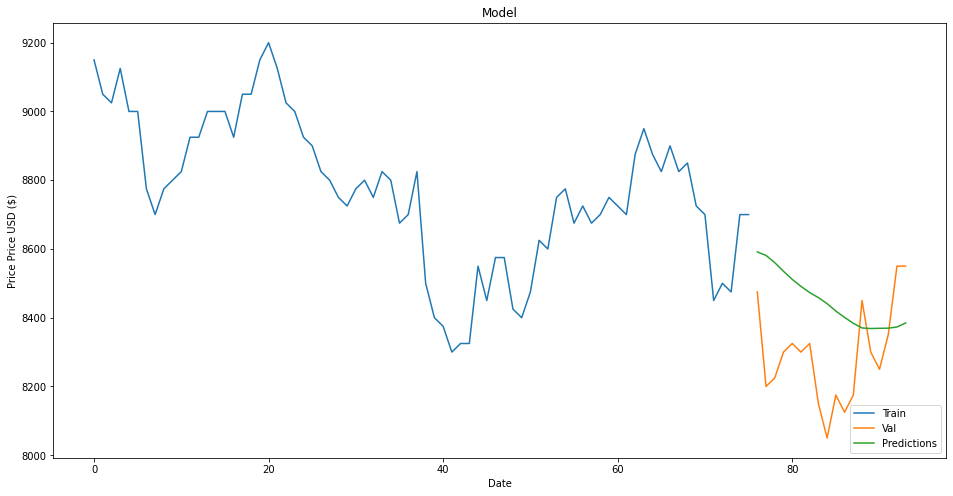

In [80]:
data = stock_data.filter(['Price'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Price Price USD ($)')
plt.plot(train)
plt.plot(validation[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()